## Emergency Department Surveilance Analysis Report ##

In [1]:
#import the packages that will be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [8]:
#import csv file into pandas dataframe
ED = pd.read_csv('sampledata1.csv')
display(ED.head())

,Chart,Unnamed: 1,Gender,Unnamed: 3,DoB,Age,Insurance,Unnamed: 7,Day,Arrived DateTime,...,LOS (hh:mm),LOS (minutes),Unnamed: 39,ExitDiagnosis,Unnamed: 41,Admitted Date Time,Unnamed: 43,AdmittedTo,Unnamed: 45,PatientGroup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31487.0,NaN,Female,NaN,18/03/1952,69.0,None,NaN,Mon,23/08/2021 00:00,...,12:55,775.0,NaN,No Exit Diagnosis,NaN,23/08/2021 12:55,NaN,Pre Discharge Unit,NaN,Vomiting
2,84548.0,NaN,Female,NaN,25/09/1996,24.0,NaN,NaN,Mon,23/08/2021 01:29,...,05:01,301.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Swelling
3,234873.0,NaN,Female,NaN,10/06/1998,23.0,Irish Life,NaN,Mon,23/08/2021 01:40,...,04:20,260.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Query Coronavirus
4,49040.0,NaN,Female,NaN,31/01/1972,49.0,NaN,NaN,Mon,23/08/2021 02:26,...,00:49,49.0,NaN,No Exit Diagnosis,NaN,NaN,NaN,NaN,NaN,Assault


In [9]:
ED.dropna(how = 'all', axis = 1, inplace = True) # remove blank columns
ED.drop('ExitDiagnosis', axis = 1, inplace = True) # Dropping column with no useful data.
print(ED.shape) # checking shape of set

(686, 27)


In [48]:
print(ED.isna().sum()) # checking missing values in the set
ED.dropna(how = 'all', inplace = True) # remove blank rows
print(ED.shape) # checking shape of set

Chart                       0
Gender                      0
DoB                         0
Age                         0
Insurance                   0
Day                         0
Arrived DateTime            0
Previous AE Attendance    134
Attendance Type             0
Transport                   0
Referral Source             0
PresentedWith               2
Referred To                 0
Triage DateTime             2
Arrival to Triage Time      0
Triage                      2
Triage End DateTime         2
Seen DateTime             112
Arrival to Seen Time      112
Lodged DateTime           565
Outcome                     0
ED Depart DateTime          1
LOS (hh:mm)                 0
LOS (minutes)               0
Admitted Date Time        497
AdmittedTo                497
PatientGroup                0
lenstay                     1
dtype: int64
(677, 28)


In [11]:
# replacing nan values 
print(ED.head())
ED['Insurance'].fillna( 'None', inplace = True)

      Chart  Gender         DoB   Age   Insurance  Day    Arrived DateTime  \
1   31487.0  Female  18/03/1952  69.0        None  Mon  23/08/2021  00:00    
2   84548.0  Female  25/09/1996  24.0         NaN  Mon  23/08/2021  01:29    
3  234873.0  Female  10/06/1998  23.0  Irish Life  Mon  23/08/2021  01:40    
4   49040.0  Female  31/01/1972  49.0         NaN  Mon  23/08/2021  02:26    
5   64593.0    Male  17/09/2002  18.0        None  Mon  23/08/2021  03:59    

  Previous AE Attendance Attendance Type            Transport  ...  \
1     02/06/2021  12:28   New Attendance            Ambulance  ...   
2                    NaN  New Attendance          Private Own  ...   
3                    NaN  New Attendance  Private Accompanied  ...   
4     09/11/2013  16:27   New Attendance            Ambulance  ...   
5     17/11/2020  11:01   New Attendance  Private Accompanied  ...   

        Seen DateTime Arrival to Seen Time Lodged DateTime          Outcome  \
1  23/08/2021  01:52           

In [12]:
ED.dtypes

Chart                     float64
Gender                     object
DoB                        object
Age                       float64
Insurance                  object
Day                        object
Arrived DateTime           object
Previous AE Attendance     object
Attendance Type            object
Transport                  object
Referral Source            object
PresentedWith              object
Referred To                object
Triage DateTime            object
Arrival to Triage Time     object
Triage                     object
Triage End DateTime        object
Seen DateTime              object
Arrival to Seen Time       object
Lodged DateTime            object
Outcome                    object
ED Depart DateTime         object
LOS (hh:mm)                object
LOS (minutes)             float64
Admitted Date Time         object
AdmittedTo                 object
PatientGroup               object
dtype: object

In [13]:
#Converting date columns from object to datetime format.
ED[['Arrived DateTime','Triage DateTime','Seen DateTime']] = ED[['Arrived DateTime','Triage DateTime','Seen DateTime']].apply(pd.to_datetime)
ED[['Admitted Date Time','ED Depart DateTime','Lodged DateTime']]=ED[['Admitted Date Time','ED Depart DateTime','Lodged DateTime']].apply(pd.to_datetime)
ED.dtypes

Chart                            float64
Gender                            object
DoB                               object
Age                              float64
Insurance                         object
Day                               object
Arrived DateTime          datetime64[ns]
Previous AE Attendance            object
Attendance Type                   object
Transport                         object
Referral Source                   object
PresentedWith                     object
Referred To                       object
Triage DateTime           datetime64[ns]
Arrival to Triage Time            object
Triage                            object
Triage End DateTime               object
Seen DateTime             datetime64[ns]
Arrival to Seen Time              object
Lodged DateTime           datetime64[ns]
Outcome                           object
ED Depart DateTime        datetime64[ns]
LOS (hh:mm)                       object
LOS (minutes)                    float64
Admitted Date Ti

In [14]:
# Get the average length of stay

ED['lenstay'] = ED['ED Depart DateTime']-ED['Arrived DateTime']
print("The Average length of stay this week was ", ED['lenstay'].mean())

The Average length of stay this week was  0 days 07:26:38.165680473


In [15]:
# group data to find which day has the most attendances by percentage

daygroup = ED[['Day', 'Chart']]
daygroup = daygroup.groupby('Day').count()
print(daygroup)
daypercent = daygroup / ED['Chart'].count()*100
daypercent = pd.DataFrame(daypercent.astype(int))
daypercent.rename(columns = {'Chart':'% attendance'}, inplace = 'True')
daypercent

     Chart
Day       
Fri    113
Mon    114
Sat     67
Sun     86
Thu     92
Tue    106
Wed     99


,% attendance
Day,
Fri,16
Mon,16
Sat,9
Sun,12
Thu,13
Tue,15
Wed,14


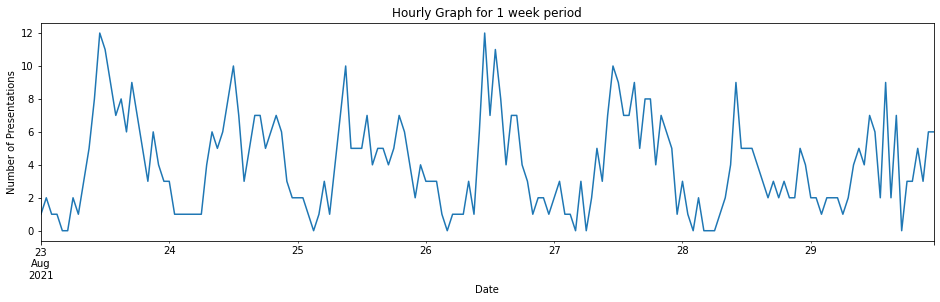

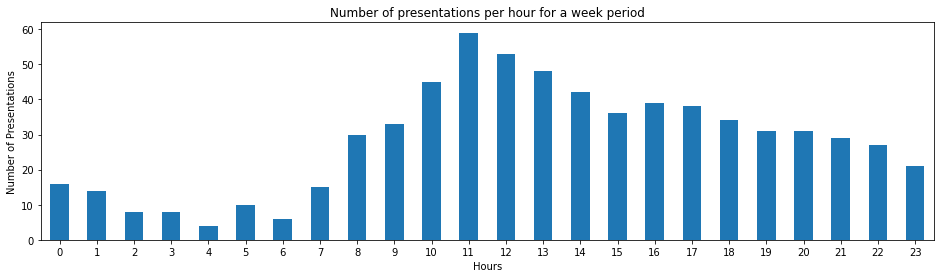

In [16]:
# group data by hour to see when the busiest period of the days is over the week

fig, axs = plt.subplots(figsize=(16, 4))
Arr_hour = ED.resample('h', on='Arrived DateTime').Chart.count().plot()
plt.title("Hourly Graph for 1 week period") 
plt.ylabel("Number of Presentations")
plt.xlabel("Date")
plt.show()

fig, axs = plt.subplots(figsize=(16, 4))
Arr_hour2 = ED.groupby(ED["Arrived DateTime"].dt.hour)["Chart"].count().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Number of presentations per hour for a week period") 
plt.ylabel("Number of Presentations")
plt.xlabel("Hours")
plt.show()

In [17]:
# For loop to get the number of presentataions by Ambulance

count = 0
for i in ED['Transport']:
    if (i == 'Ambulance'):
        count +=1
print(count, ' presentations by ambulance')
print('This equates to', count / len('Chart'), 'percent of all attendances')

144  presentations by ambulance
This equates to 28.8 percent of all attendances


In [18]:
#import csv file into pandas dataframe
ED2 = pd.read_csv('sampledata2.csv')
display(ED2.head())
print(ED2.isna().sum()) 
print(ED2.dtypes)
ED2['ARRIVED_DTTM'] = pd.to_datetime(ED2['ARRIVED_DTTM'])
ED2.rename(columns = {'ARRIVED_DTTM':'Arrived DateTime'}, inplace = 'True')

,mrn,DTTM_OF_BIRTH,Age,AgeGroup,ARRIVED_DTTM,DEPARTED_DTT,arrival_mode,new or review,presented_with,referral_source,resp_con_surname,triage_category,specialty,patient_grp,discharge_method,discharge_reason,discharge_destination,Lodged Dttm,Discharge_carer,nat_of_main_injry
0,234499,31/08/1993 00:00:00,28.0,A,27/08/2021 20:39:00,28/08/2021 07:37:00,Private Own,New Attendance,Wounds,Internal,NaN,4 Standard,NaN,Needlestick Injury,Did Not Wait,Discharged Home,Home,NaN,Linus Offiah,NaN
1,83346,17/09/1943 00:00:00,78.0,OP,25/08/2021 18:22:00,26/08/2021 08:57:00,Ambulance,New Attendance,Unwell Adult,General Practitioner Referral,NaN,3 Urgent,Medical,Unwell,Admit to Ward,Admit to Ward,Other,26/08/2021 04:55:00,M. Ashraf Butt,NaN
2,700911,28/08/2003 00:00:00,18.0,A,27/08/2021 20:53:00,28/08/2021 15:00:00,Private Accompanied,New Attendance,Abdominal Pain in Adults,General Practitioner Referral,NaN,3 Urgent,NaN,Abdominal Pain,Discharged Home,Follow Up - OPD,Home,NaN,Murtaza Essajee,NaN
3,137691,28/11/1955 00:00:00,66.0,OP,27/08/2021 01:19:00,27/08/2021 07:11:00,Ambulance,New Attendance,Unwell Adult,Self Referral,NaN,2 Very Urgent,Medical,Unwell,Admit to Ward,Admit to Ward,Home,27/08/2021 05:59:00,Yasir Banaga,NaN
4,38472,06/01/1935 00:00:00,86.0,OP,23/08/2021 10:05:00,24/08/2021 00:20:00,Private Accompanied,New Attendance,Chest Pain,Self Referral,NaN,3 Urgent,Medical,Chest Pain,Admit to Ward,Admit to Ward,Other,23/08/2021 21:36:00,Vladimir Stoyanov,NaN


mrn                        0
DTTM_OF_BIRTH              0
Age                        0
AgeGroup                   0
ARRIVED_DTTM               0
DEPARTED_DTT               0
arrival_mode               0
new or review              0
presented_with             2
referral_source            0
resp_con_surname         580
triage_category            2
specialty                424
patient_grp                0
discharge_method           0
discharge_reason           0
discharge_destination      0
Lodged Dttm              478
Discharge_carer           17
nat_of_main_injry        579
dtype: int64
mrn                        int64
DTTM_OF_BIRTH             object
Age                      float64
AgeGroup                  object
ARRIVED_DTTM              object
DEPARTED_DTT              object
arrival_mode              object
new or review             object
presented_with            object
referral_source           object
resp_con_surname         float64
triage_category           object
specialty  

,Chart,Gender,DoB,Age,Insurance,Day,Arrived DateTime,Previous AE Attendance,Attendance Type,Transport,...,Arrival to Seen Time,Lodged DateTime,Outcome,ED Depart DateTime,LOS (hh:mm),LOS (minutes),Admitted Date Time,AdmittedTo,PatientGroup,lenstay
1,31487.0,Female,18/03/1952,69.0,None,Mon,2021-08-23 00:00:00,02/06/2021 12:28,New Attendance,Ambulance,...,01:52,NaT,Admit to Ward,2021-08-23 12:55:00,12:55,775.0,2021-08-23 12:55:00,Pre Discharge Unit,Vomiting,0 days 12:55:00
2,84548.0,Female,25/09/1996,24.0,None,Mon,2021-08-23 01:29:00,NaN,New Attendance,Private Own,...,02:31,NaT,Discharged Home,2021-08-23 06:30:00,05:01,301.0,NaT,NaN,Swelling,0 days 05:01:00
3,234873.0,Female,10/06/1998,23.0,Irish Life,Mon,2021-08-23 01:40:00,NaN,New Attendance,Private Accompanied,...,01:20,NaT,Discharged Home,2021-08-23 06:00:00,04:20,260.0,NaT,NaN,Query Coronavirus,0 days 04:20:00
4,49040.0,Female,31/01/1972,49.0,None,Mon,2021-08-23 02:26:00,09/11/2013 16:27,New Attendance,Ambulance,...,NaN,NaT,Did Not Wait,2021-08-23 03:15:00,00:49,49.0,NaT,NaN,Assault,0 days 00:49:00
5,64593.0,Male,17/09/2002,18.0,None,Mon,2021-08-23 03:59:00,17/11/2020 11:01,New Attendance,Private Accompanied,...,00:51,NaT,Discharged Home,2021-08-23 07:41:00,03:42,222.0,NaT,NaN,Query Coronavirus,0 days 03:42:00


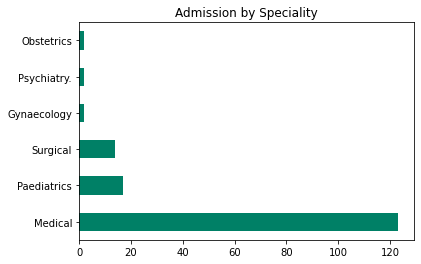

In [19]:
EDmerged = ED.merge(ED2, on = 'Arrived DateTime', how = 'outer')
EDmerged.drop_duplicates(subset = ['Arrived DateTime', 'DoB'], keep = 'first')
display(ED.head())
seenbyspec = EDmerged['specialty'].value_counts().plot(kind='barh', colormap = 'summer', title = 'Admission by Speciality')
plt.show()

In [20]:
#creating a dictionary to use as headings for the following functions
headings = {'arrtotri': 'Arrival to triage times', 'arrtosee': 'Arrival to seen times', 
            'arrtolod' : 'Arrival to lodge times' , 'arrtoadm' :'Arrival to admit times'}

In [21]:
#function to find the mean, median, min and max of wait times in the department

arrtotri = ED['Triage DateTime'] - ED['Arrived DateTime']
arrtosee = ED['Seen DateTime'] - ED['Arrived DateTime']
arrtolod = ED['Lodged DateTime'] - ED['Arrived DateTime']
arrtoadm = ED['Admitted Date Time'] - ED['Arrived DateTime']

def dtimestats(value):
    """ This function returns the mean, median
        min, and max times"""
        
    print("The mean is " + str(value.mean()))
    print("The median is " + str(value.median()))
    print("The min is " + str(value.min()))
    print("The max is " + str(value.max()))
    print("")        
    
print(headings['arrtotri'])
dtimestats(arrtotri)

print(headings['arrtosee'])
dtimestats(arrtosee)

print(headings['arrtolod'])
dtimestats(arrtolod)

print(headings['arrtoadm'])
dtimestats(arrtoadm)

Arrival to triage times
The mean is 0 days 00:28:16.977777777
The median is 0 days 00:24:00
The min is 0 days 00:01:00
The max is 0 days 03:12:00

Arrival to seen times
The mean is 0 days 03:01:28.778761061
The median is 0 days 02:01:00
The min is -1 days +17:32:00
The max is 0 days 12:59:00

Arrival to lodge times
The mean is 0 days 09:34:41.250000
The median is 0 days 09:50:30
The min is 0 days 02:46:00
The max is 1 days 03:04:00

Arrival to admit times
The mean is 0 days 10:55:22.666666666
The median is 0 days 10:36:30
The min is 0 days 00:13:00
The max is 0 days 23:58:00



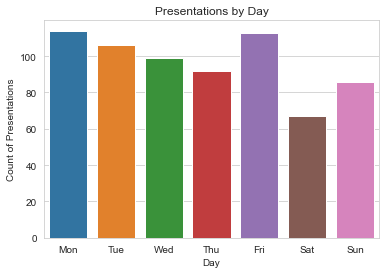

In [22]:
# View attendances to department by day.
ED['Day'].value_counts()
sns.set_style("whitegrid")
g = sns.countplot(x = 'Day', data = ED)
plt.title("Presentations by Day") 
plt.ylabel("Count of Presentations")
plt.xlabel("Day")
plt.show()

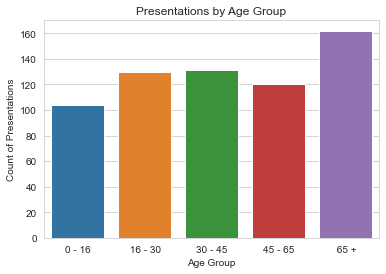

In [23]:
#presentation by age
age_dem = pd.cut(ED['Age'], bins = [0, 16, 30, 45 ,65, np.inf])
Age_range = ['0 - 16' , ' 16 - 30', '30 - 45', '45 - 65', ' 65 +' ]
ED.groupby(age_dem).count()
sns.set_style("whitegrid")
g = sns.countplot( x = age_dem, data = ED)
g.set_xticklabels(Age_range)
plt.title("Presentations by Age Group") 
plt.ylabel("Count of Presentations")
plt.xlabel("Age Group")
plt.show()

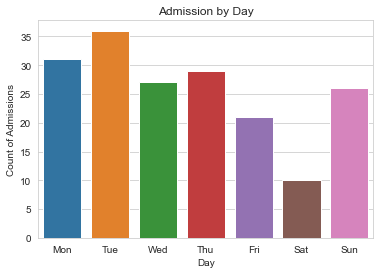

In [24]:
ED['Outcome'].value_counts()
Admitted = ED[ED['Outcome'].isin(['Admit to Ward'])]
#print(admitted)
sns.set_style("whitegrid")
g = sns.countplot(x = 'Day', data = Admitted)
plt.title("Admission by Day") 
plt.ylabel("Count of Admissions")
plt.xlabel("Day")
plt.show()

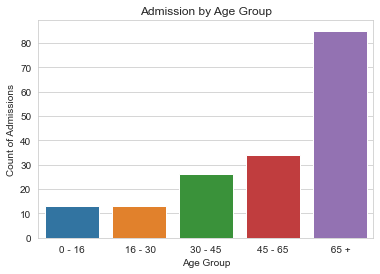

In [25]:
age_dem = pd.cut(Admitted['Age'], bins = [0, 16, 30, 45 ,65, np.inf])
Age_range = ['0 - 16' , ' 16 - 30', '30 - 45', '45 - 65', ' 65 +' ]
Admitted.groupby(age_dem).count()
sns.set_style("whitegrid")
g = sns.countplot( x = age_dem, data = Admitted)
g.set_xticklabels(Age_range)
plt.title("Admission by Age Group") 
plt.ylabel("Count of Admissions")
plt.xlabel("Age Group")
plt.show()

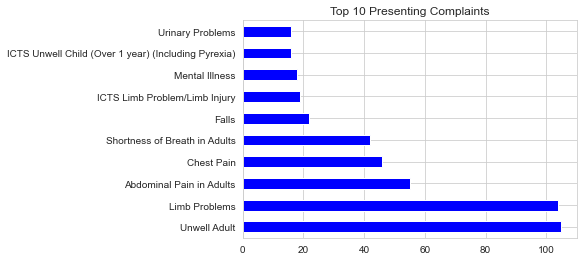

In [37]:
#10 presenting complaints
top10presentcomplaints = ED['PresentedWith'].value_counts()[:10].plot(kind='barh', colormap = 'winter', title = 'Top 10 Presenting Complaints')
plt.show()

### Generate Valuable Insights

1.	The presentation by day and the admssion by day graphs give us breakdown of the the daily attendaces and admission 
to the Emergency department, with Monday and Friday being the busiest days of the week for attendances. This would lead 
you to believe that the admission by day graph would corrolate with thiese days. However Tuesday has the highest number 
of admissions, with Sunday being extraordinarily high compared to the number of attendances for that day.
Tuesdays high admission rate seems to be overflow from Mondays high attendances and wait times leading into Tuesday morning.
After auditing admission notes from Sundays admissions it was found that many patients were being admitted Sunday for scans
on Monday morning as many of the diagnostics are closed on weekends. This is leading to extra pressure on the department on
a Monday which is the busiest day of the week. This is an area that needs to be looked into in more detail.

2.	The ‘Attendance by Age’ graph shows the over 65 age group having more attendances to the department than the rest, 
but just slightly. When you contrast this with the numbers of this age group being admitted in the ‘Admission by Age’ graph,
the over 65’s have more admissions than the other age groups combined. 

3.	The hourly attendances graph shows a peak in numbers at 11 am with the numbers tapering off as the day progresses. 
GP surgeries open at 9:30am so we often see an influx of GP referrals at this time. There may be a case for staggering 
    staff starting times to coincide with the attendance times.
    
4.	The admission by speciality graph has an overwhelming majority for the medical admissions. This corrolates with the 
over 65 admission rate as many in this age group would present with medical issues. From working in the department I know
that many of the long wait times are due to patients waiting of a medical review. Its clear to see that more medical doctors
are needed in the department or a medical assessment unit.
5.	In the final chart, ‘Top 10 presenting complaints’, we can see that Limb Problems and Unwell Adult are the two standout
presenting complaints. While Unwell adult can be a broad complaint encompassin many different complaints, limb problem is 
in general an injury or a problem that can be assessed by the Advanced nurse practitioner for minor injuries (ANP). This 
graph shows the importance of the ANP’s to the department.


### Machine Learning ###

It would be the hope that if data such as attendance numbers, admissiom numbers and admission speciality were 
continuously observed, we could create a supervised training model that could potentially predict each days activity 
level. We could predict how many patients would attend the department each day, of these attendances how many would 
be admitted and admitted under what speciality. This would be of great benefit for staffing levels, stock levels and 
also how many beds would be needed on the medical or surgical wards each day and hopefully eliminating patients stay 
on trolleys in ED. This type of machine learning would be classified as regression as we are predicting a number.
